In [243]:
#Importación de las librerías a utilizar.
import pyodbc
import pandas as pd
import numpy as np
import pymssql
from datetime import datetime as dt
import datetime
from PIL import Image
import seaborn as sb
from termcolor import colored as cl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from sklearn import metrics
import seaborn as sns
import reverse_geocode
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')
%run Conexiones.ipynb import *
%run Métodos.ipynb import *

## BASE de DATOS creado por OSCAR DUVERNAY 2-18-0818
# INFORMACIÓN SOBRE LA BASE DE DATOS

## Productos que ofrecemos

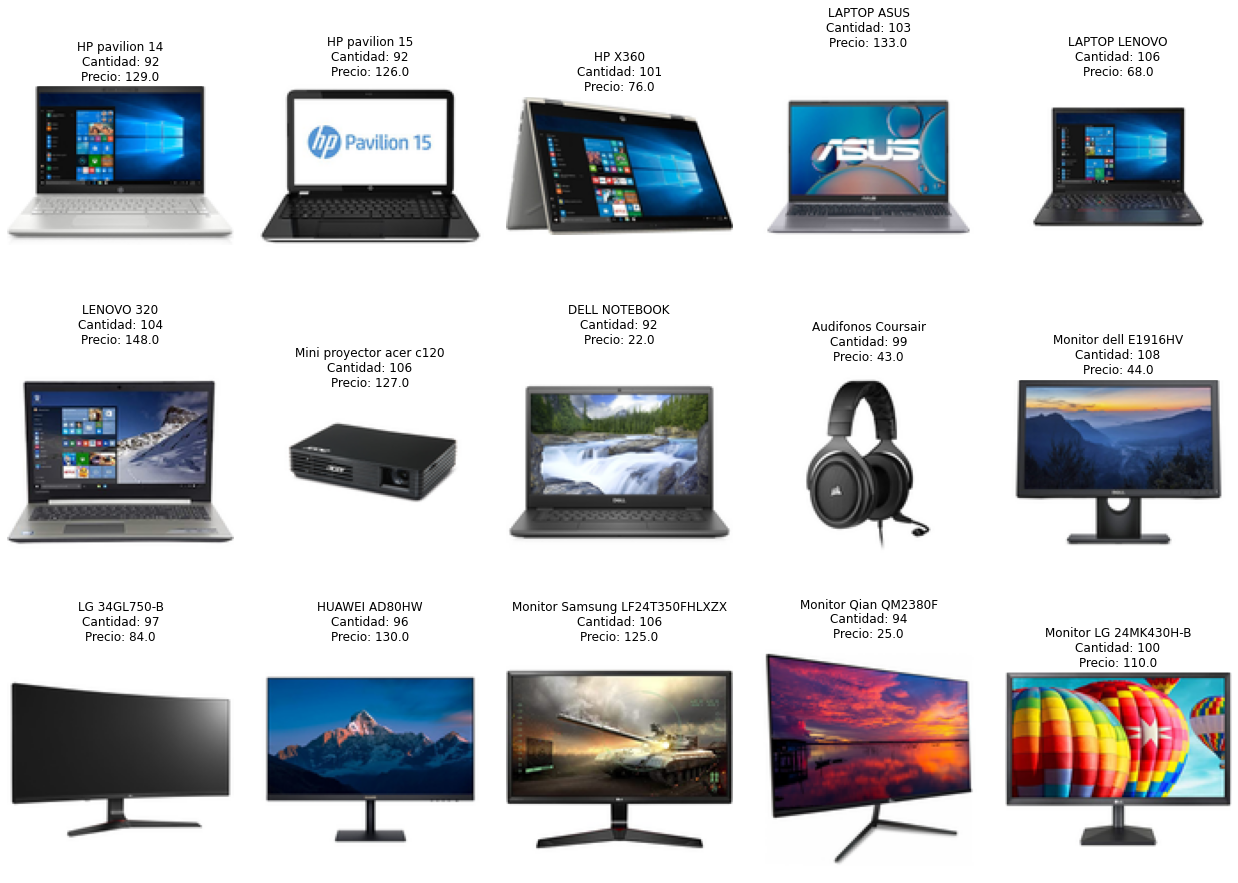

In [21]:
nombres, cantidades, precios, imagenes, imagenes_mode, imagenes_size = ver_productos()
size = 128, 128
fig = plt.figure(figsize=(10, 15))
rows = 3
columns = 5

for f, i in enumerate(imagenes):  
    img = Image.new(imagenes_mode[f], imagenes_size[f])
    img.putdata(imagenes[f])
    img.thumbnail(size, Image.ANTIALIAS)
    fig.add_subplot(rows, columns, f+1)
    plt.imshow(img)
    plt.axis('off')
    nombres[f] = nombres[f] + "\nCantidad: {0}".format(int(cantidades[f])) + "\nPrecio: {0}".format(precios[f])
    plt.title(nombres[f])
    plt.subplots_adjust(left=0.3,
                        bottom=0.1, 
                        right=2, 
                        top=0.9, 
                        wspace=0.1, 
                        hspace=0.1)

## Cantidad de ventas por año

In [105]:
comando = "EXEC Cantidad_Ventas_Por_Anio"
cursor = conn.cursor()
sql_query = pd.read_sql_query (comando, conn)
DS = pd.DataFrame(sql_query)
DS.columns = ['MES', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
                           '2019', '2020', '2021', '2022']
DS.drop(DS.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
DS = DS.set_index('MES')

bcr.bar_chart_race(
        df = DS,
        steps_per_period = 10,
        title = 'CANTIDAD DE VENTAS POR AÑO')

C:\Users\Usuario\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Usuario\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


## Segmentación de clientes

In [202]:
comando = "SELECT * FROM Clientes"
cursor = conn.cursor()
sql_query = pd.read_sql_query (comando, conn)
DS = pd.DataFrame(sql_query)
names = ['ID', 'NOMBRE', 'APELLIDO', 'EMAIL', 'SEXO', 'DIRECCIÓN', 'FECHA DE NACIMIENTO', 'TELÉFONO']
DS.columns = names
today = datetime.date.today()
f = 0
age = []

for datebirth in DS.values: 
    age.append(today.year - datebirth[6].year - ((today.month, today.day) < (datebirth[6].month, datebirth[6].day)))
    f = f + 1
    
DS['EDAD'] = age  
DS = DS[['ID', 'NOMBRE', 'APELLIDO', 'EMAIL', 'SEXO', 'DIRECCIÓN', 'FECHA DE NACIMIENTO', 'EDAD', 'TELÉFONO']]
DS.set_index('ID', inplace = True)
DS.head()

,NOMBRE,APELLIDO,EMAIL,SEXO,DIRECCIÓN,FECHA DE NACIMIENTO,EDAD,TELÉFONO
ID,,,,,,,,
1,Dwayne,Ingman,dingman0@bloglines.com,M,"19.390837, -70.521058",1977-07-15,44,311-892-6905
2,Kingsly,Gallgher,kgallgher1@jugem.jp,M,"19.390837, -70.521058",1987-03-11,34,320-156-3800
3,Glori,Ledgard,gledgard2@barnesandnoble.com,F,"19.390837, -70.521058",1982-11-18,39,472-218-0360
4,Ash,Bruhnke,abruhnke3@gmpg.org,M,"19.390837, -70.521058",1993-06-12,28,254-441-4139
5,Trumaine,Clampton,tclampton4@technorati.com,M,"19.390837, -70.521058",1997-06-11,24,797-921-8220


count    767.000000
mean      37.173403
std       12.324377
min       21.000000
25%       27.000000
50%       35.000000
75%       48.000000
max       61.000000
Name: EDAD, dtype: float64


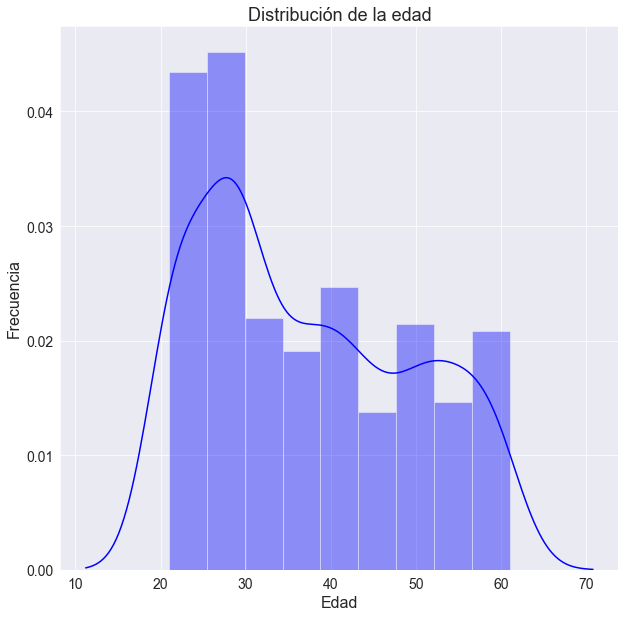

In [203]:
print(cl(DS['EDAD'].describe(), attrs = ['bold']))
fig = plt.figure(figsize=(10, 10))
sb.distplot(DS['EDAD'], 
            color = 'blue')
plt.title('Distribución de la edad', 
          fontsize = 18)
plt.xlabel('Edad', 
           fontsize = 16)
plt.ylabel('Frecuencia', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### Se puede concluir que la edad con el mayor número de clientes está entre los 21 y 30 años. El recuento de clientes más bajo ronda por los 45 y los 55 años.

.......................................
Cantidad de clientes: 767
.......................................
Cantidad de hombres: 382
.......................................
Cantidad de mujeres: 385
.......................................


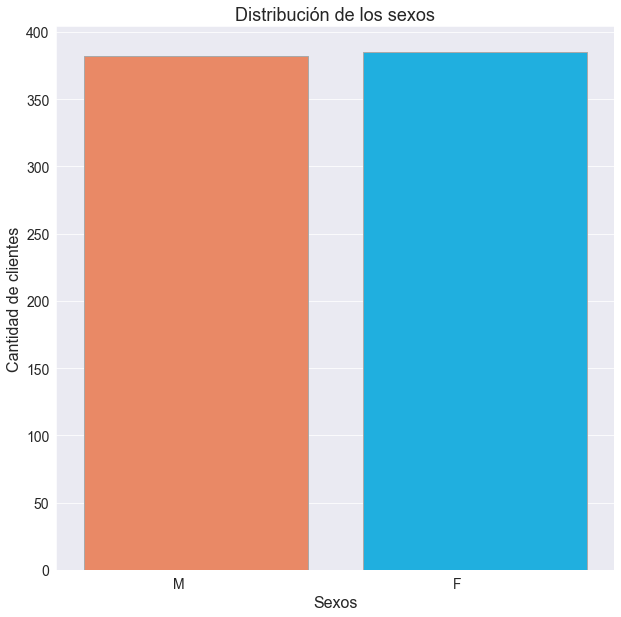

In [204]:
masculino = DS[DS['SEXO'].str.strip() == 'M']
femenino = DS[DS['SEXO'].str.strip() == 'F']

print(cl('.......................................', attrs = ['bold']))
print(cl('Cantidad de clientes: {}'.format(len(DS['SEXO'])), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Cantidad de hombres: {}'.format(len(masculino)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Cantidad de mujeres: {}'.format(len(femenino)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

fig = plt.figure(figsize=(10, 10))
sb.countplot(DS['SEXO'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Distribución de los sexos', 
          fontsize = 18)
plt.xlabel('Sexos', 
           fontsize = 16)
plt.ylabel('Cantidad de clientes', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### Como pudimos observar, los clientes con sexo femenino son mayoría. Estos representan un 50.2% del total de clientes.

In [205]:
lat = []
lon = []
ciudades = []

for row in DS['DIRECCIÓN']:
    try:
        lat.append(float(row.split(',')[0]))
        lon.append(float(row.split(',')[1]))
    except:
        lat.append(nan)
        lon.append(nan)

DS['LATITUD'] = lat
DS['LONGITUD'] = lon

for f, i in DS['LATITUD'].iteritems():
    if(f == 765):
        coordinates = (DS['LATITUD'][f], DS['LONGITUD'][f]), (DS['LATITUD'][f+1], DS['LONGITUD'][f+1]), (DS['LATITUD'][f+2], DS['LONGITUD'][f+2])
        ciudades.append(reverse_geocode.search(coordinates)[0]['city'])
        ciudades.append(reverse_geocode.search(coordinates)[1]['city'])
        ciudades.append(reverse_geocode.search(coordinates)[2]['city'])
        break
    else:
        coordinates = (DS['LATITUD'][f], DS['LONGITUD'][f]), (DS['LATITUD'][f+1], DS['LONGITUD'][f+1])
        ciudades.append(reverse_geocode.search(coordinates)[0]['city'])
    
DS['CIUDAD'] = ciudades 
DS.drop(DS.columns[[8,9]], axis=1, inplace=True)
DS.head(767)

,NOMBRE,APELLIDO,EMAIL,SEXO,DIRECCIÓN,FECHA DE NACIMIENTO,EDAD,TELÉFONO,CIUDAD
ID,,,,,,,,,
1,Dwayne,Ingman,dingman0@bloglines.com,M,"19.390837, -70.521058",1977-07-15,44,311-892-6905,Moca
2,Kingsly,Gallgher,kgallgher1@jugem.jp,M,"19.390837, -70.521058",1987-03-11,34,320-156-3800,Moca
3,Glori,Ledgard,gledgard2@barnesandnoble.com,F,"19.390837, -70.521058",1982-11-18,39,472-218-0360,Moca
4,Ash,Bruhnke,abruhnke3@gmpg.org,M,"19.390837, -70.521058",1993-06-12,28,254-441-4139,Moca
5,Trumaine,Clampton,tclampton4@technorati.com,M,"19.390837, -70.521058",1997-06-11,24,797-921-8220,Moca
...,...,...,...,...,...,...,...,...,...
763,Paquito,Rantoul,prantoull6@comcast.net,M,"19.390837, -70.521058",1997-10-02,24,238-852-9104,Moca
764,Maria,Hackleton,mhackletonl7@whitehouse.gov,F,"19.390837, -70.521058",1998-12-29,22,589-989-5510,Moca
765,Patric,Sayers,psayersl8@dyndns.org,M,"19.188890, -70.521354",1992-09-10,29,473-408-6993,Concepción de La Vega


In [206]:
DS['CIUDAD'].unique()

array(['Moca', 'Santo Domingo Este', 'Puerto Plata',
       'Concepción de La Vega', 'Cana Chapetón'], dtype=object)

In [207]:
mapping_sex = {
    'M': 0, 
    'F': 1, 
}

mapping_city = {
    'Moca': 0, 
    'Santo Domingo Este': 1, 
    'Puerto Plata': 2,
    'Concepción de La Vega': 3, 
    'Cana Chapetón': 4
}

DS["SEXO"] = DS["SEXO"].str.strip().replace(mapping_sex)  
DS['CIUDAD'] = DS['CIUDAD'].replace(mapping_city)  
DS.head()

,NOMBRE,APELLIDO,EMAIL,SEXO,DIRECCIÓN,FECHA DE NACIMIENTO,EDAD,TELÉFONO,CIUDAD
ID,,,,,,,,,
1,Dwayne,Ingman,dingman0@bloglines.com,0,"19.390837, -70.521058",1977-07-15,44,311-892-6905,0
2,Kingsly,Gallgher,kgallgher1@jugem.jp,0,"19.390837, -70.521058",1987-03-11,34,320-156-3800,0
3,Glori,Ledgard,gledgard2@barnesandnoble.com,1,"19.390837, -70.521058",1982-11-18,39,472-218-0360,0
4,Ash,Bruhnke,abruhnke3@gmpg.org,0,"19.390837, -70.521058",1993-06-12,28,254-441-4139,0
5,Trumaine,Clampton,tclampton4@technorati.com,0,"19.390837, -70.521058",1997-06-11,24,797-921-8220,0


In [208]:
DS.drop(DS.columns[[0,1,2,4,5,7]], axis=1, inplace=True)
X = DS.values
X = np.nan_to_num(X)

print(DS.head())
sc = StandardScaler()

DS_scaled = sc.fit_transform(X)
print(cl('Samples: ', attrs = ['bold']), DS_scaled[:5])

    SEXO  EDAD  CIUDAD
ID                    
1      0    44       0
2      0    34       0
3      1    39       0
4      0    28       0
5      0    24       0
Samples:  [[-1.00391902  0.55427158 -0.52302601]
 [-1.00391902 -0.25765795 -0.52302601]
 [ 0.99609628  0.14830682 -0.52302601]
 [-1.00391902 -0.74481567 -0.52302601]
 [-1.00391902 -1.06958748 -0.52302601]]


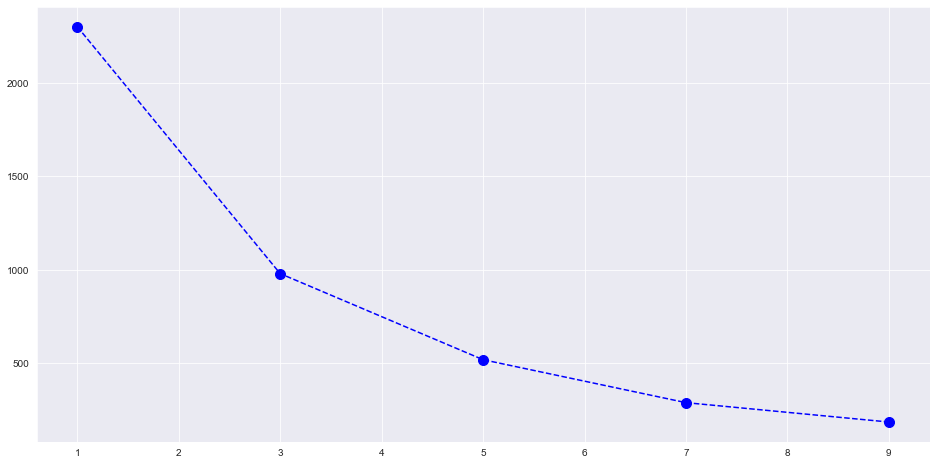

In [209]:
#Muestra del método del codo para determinar el número de clusters a usar.
sns.set_style("darkgrid")
plt.figure(figsize = [16, 8])

ssd = []
range_n_clusters = [1, 3, 5, 7, 9]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(DS_scaled)
    ssd.append(kmeans.inertia_)
    
plt.xticks(ticks = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.plot(ssd, '--bo', markersize = 10)
plt.show()

In [210]:
#Muestra del análisis de la silueta, método que también ayuda a determinar el número correcto de clusters a usar.
#El score que más se acerque al 1, es el número de clusters correcto.
range_n_clusters = [2, 4, 6, 8, 10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(DS_scaled )
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(DS_scaled , cluster_labels)
    print("Para el número de clusters = {0}, el score de la silueta es {1}".format(num_clusters, silhouette_avg))

Para el número de clusters = 2, el score de la silueta es 0.39383062617730236
Para el número de clusters = 4, el score de la silueta es 0.483051247097477
Para el número de clusters = 6, el score de la silueta es 0.5749697062187719
Para el número de clusters = 8, el score de la silueta es 0.601024022631022
Para el número de clusters = 10, el score de la silueta es 0.5984505253901788


In [224]:
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
y_kmeans = model.fit_predict(DS_scaled)

labels = model.labels_
centers = kmeans.cluster_centers_
print(cl(labels[:100], attrs = ['bold']))
print(cl(centers[:100], attrs = ['bold']))

[2 2 1 2 2 1 2 2 2 1 2 1 2 1 0 1 0 1 0 0 1 2 1 1 0 2 2 2 2 2 2 2 0 2 2 1 2
 2 1 1 0 0 1 1 1 1 1 2 2 1 2 0 1 1 2 1 2 0 2 0 2 2 0 2 1 2 2 1 2 0 1 0 2 1
 1 1 0 1 2 2 2 0 2 2 2 0 2 0 0 1 1 1 2 1 2 2 2 2 0 1]
[[-1.00391902 -0.92414111 -0.4916559 ]
 [ 0.99609628  0.1723333  -0.52302601]
 [-1.00391902  1.09190059  1.86343381]
 [-1.00391902  1.39946088 -0.50989214]
 [ 0.99609628 -0.82600862  1.91232897]
 [ 0.99609628  1.38008938 -0.46565173]
 [ 0.99609628 -0.94287727 -0.48999233]
 [ 0.99609628  0.96023635  1.89565838]
 [-1.00391902  0.17035922 -0.45573519]
 [-1.00391902 -0.74094934  1.89079181]]


In [212]:
DS_clusters = pd.DataFrame(DS_scaled)
DS_clusters.columns = ['SEXO', 'EDAD', 'CIUDAD']
DS_clusters['NO. CLUSTER'] = labels
DS_clusters.head(100)#DS['NO. CLUSTER'] = labels
#DS.head(100)

,SEXO,EDAD,CIUDAD,NO. CLUSTER
0,-1.003919,0.554272,-0.523026,2
1,-1.003919,-0.257658,-0.523026,2
2,0.996096,0.148307,-0.523026,1
3,-1.003919,-0.744816,-0.523026,2
4,-1.003919,-1.069587,-0.523026,2
...,...,...,...,...
95,-1.003919,-0.907202,-0.523026,2
96,-1.003919,-1.313166,-0.523026,2
97,-1.003919,1.609780,-0.523026,2
98,-1.003919,1.285008,1.657197,0


In [213]:
DS_clusters.groupby('NO. CLUSTER').mean()

,SEXO,EDAD,CIUDAD
NO. CLUSTER,,,
0,-0.003911,0.007504,1.891777
1,0.996096,-0.008772,-0.494526
2,-1.003919,0.004946,-0.487049


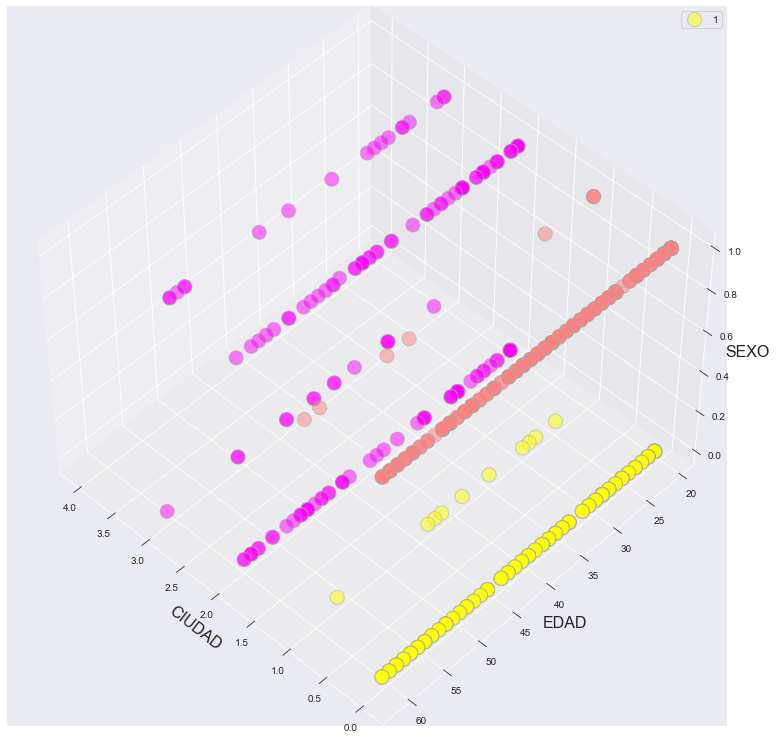

In [239]:
fig = plt.figure(figsize = [15, 10])
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(DS['CIUDAD'], DS['EDAD'], DS['SEXO'], 
           c = DS_clusters['NO. CLUSTER'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('CIUDAD', 
              fontsize = 16)
ax.set_ylabel('EDAD', 
              fontsize = 16)
ax.set_zlabel('SEXO', 
              fontsize = 16)
#ax.legend(['1', '2', '3'])
plt.show()

In [245]:
#Score de la silueta algoritmo.
km_score = metrics.silhouette_score(DS_scaled, DS_clusters['NO. CLUSTER'], metric = 'sqeuclidean')
print(km_score)

0.6171031671738144


#### El modelo no es muy bueno, pero aún así segmenta los clientes en distintos clusters.